# Continuous Wavelet Transforms

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import pywt

In [3]:
path_name = '/home/peterbermant/.fastai/data/orchive-dataset.tar/call-catalog-xsilence/N01/A36-N01-062802-D004-12218.aiff'
signal_orca, sr_orca = sf.read(path_name)
time_orca = np.linspace(0,len(signal_orca)/sr_orca,len(signal_orca))
T_orca = 1 / sr_orca

In [4]:
file = 'data/WatkinsPMacro.wav'
wf, sr_sw = sf.read(file)
signal_sw = wf[31000:37500]
time_sw = np.linspace(0,len(signal_sw)/sr_sw,len(signal_sw))
T_sw = 1 / sr_sw

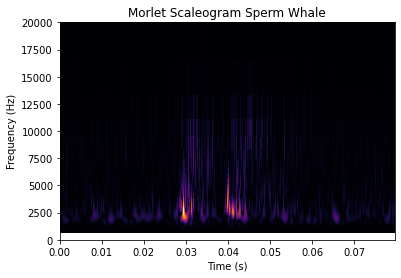

In [5]:
cwtmatr_sw, freqs_sw = pywt.cwt(signal_sw, np.arange(1, 128), "morl", sampling_period = T_sw)
fmax_sw, fmin_sw = pywt.scale2frequency('morl', 1)/T_sw, pywt.scale2frequency('morl', 128)/T_sw
plt.pcolormesh(time_sw, freqs_sw, np.abs(cwtmatr_sw), vmin=0, cmap = "inferno" )  
plt.ylim([0, 20000])
plt.ylabel("Frequency (Hz)")
plt.xlabel("Time (s)")
plt.title("Morlet Scaleogram Sperm Whale")
plt.show()

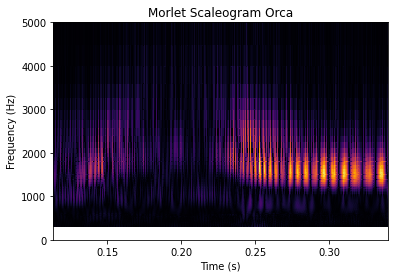

In [6]:
cwtmatr_orca, freqs_orca = pywt.cwt(signal_orca[5000:15000], np.arange(6, 512), "morl", sampling_period = T_orca)
fmax_orca, fmin_orca = pywt.scale2frequency('morl', 6)/T_orca, pywt.scale2frequency('morl', 512)/T_orca
plt.pcolormesh(time_orca[5000:15000], freqs_orca, np.abs(cwtmatr_orca), vmin=0, cmap = "inferno" )  
plt.ylim([0, 5000])
plt.ylabel("Frequency (Hz)")
plt.xlabel("Time (s)")
plt.title("Morlet Scaleogram Orca")
plt.show()

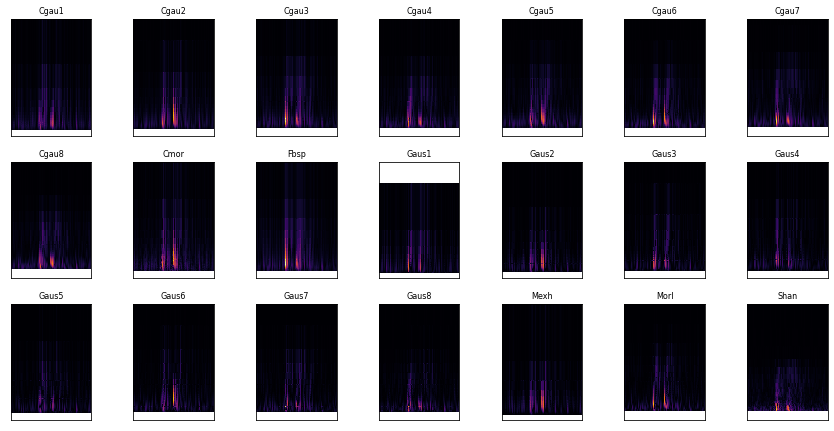

In [7]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

wavlist = pywt.wavelist(kind='continuous')
fig, axes = plt.subplots(3, 7, figsize=(12,6))
fig.tight_layout(pad=0.5)
axs = axes.flatten()
for i, wl in enumerate(wavlist):
    cwtmatr_sw, freqs_sw = pywt.cwt(signal_sw, np.arange(1, 128), wl, sampling_period = T_sw)
    axs[i].pcolormesh(time_sw, freqs_sw, np.abs(cwtmatr_sw), vmin=0, cmap = "inferno" )  
    axs[i].set_ylim([0, 20000])
    axs[i].set_title(f'{wl.capitalize()}', fontsize=8)
    axs[i].set_xticks([])
    axs[i].set_yticks([])
plt.show()

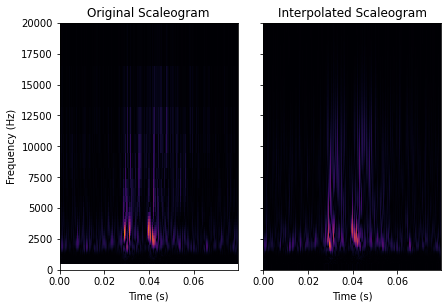

In [8]:
from scipy import interpolate
def interp_rep(ts, fs, rep, n_points=1000, ylim=20000):
    f = interpolate.RectBivariateSpline(ts, fs, rep)

    t_interp = np.linspace(0, ts[-1], n_points)
    f_interp = np.linspace(0, fs[-1], n_points)

    rep_interp = f(t_interp, f_interp)

    tt, ff = np.meshgrid(t_interp, f_interp)
    return tt, ff, rep_interp

ts_sw = time_sw
rep_sw, fs_sw = pywt.cwt(signal_sw, np.flip(np.arange(1, 128)), 'morl', sampling_period = T_sw)
tt_sw, ff_sw, rep_sw_in = interp_rep(ts_sw, fs_sw, rep_sw.T)
fig, axs = plt.subplots(1,2, sharey=True)
fig.tight_layout(pad = 1.0)
axs[0].pcolormesh(ts_sw, fs_sw, np.abs(rep_sw), cmap='inferno')
axs[0].set_ylabel('Frequency (Hz)')
axs[1].pcolormesh(tt_sw, ff_sw, np.abs(rep_sw_in.T), cmap='inferno')
for i, l in enumerate(['Original', 'Interpolated']):
    axs[i].set_ylim([0, 20000])
    axs[i].set_title(f'{l} Scaleogram')
    axs[i].set_xlabel('Time (s)')
plt.show()

In [9]:
from sklearn.decomposition import PCA
from itertools import count
def rep_goodness(rep, n_pca=150, th=0.95, vis=True):
    pca = PCA(n_components=n_pca)
    pca.fit(rep)
    
    sum_ = 0
    for feature_i in count():
        sum_ += pca.explained_variance_ratio_[feature_i]
        if sum_ > th:
            break
    if vis:
        print(f'Number of Features to Exceed Threshold th={th}: {feature_i+1}')
    
    return feature_i+1

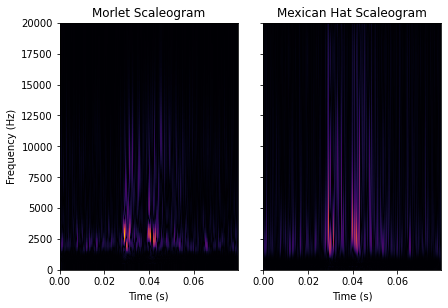

Number of Features to Exceed Threshold th=0.95: 6
Number of Features to Exceed Threshold th=0.95: 3


In [10]:
ts_morl = time_sw
rep_morl, fs_morl = pywt.cwt(signal_sw, np.flip(np.arange(1, 128)), 'morl', sampling_period = T_sw)
tt_morl, ff_morl, rep_morl_in = interp_rep(ts_morl, fs_morl, rep_morl.T)
rep_morl_in = rep_morl_in.T

ts_mexh = time_sw
rep_mexh, fs_mexh = pywt.cwt(signal_sw, np.flip(np.arange(1, 128)), 'mexh', sampling_period = T_sw)
tt_mexh, ff_mexh, rep_mexh_in = interp_rep(ts_mexh, fs_mexh, rep_mexh.T)
rep_mexh_in = rep_mexh_in.T

fig, axs = plt.subplots(1,2, sharey=True)
fig.tight_layout(pad = 1.0)
axs[0].pcolormesh(tt_morl, ff_morl, np.abs(rep_morl_in), cmap='inferno')
axs[0].set_ylabel('Frequency (Hz)')
axs[1].pcolormesh(tt_mexh, ff_mexh, np.abs(rep_mexh_in), cmap='inferno')
for i, l in enumerate(['Morlet', 'Mexican Hat']):
    axs[i].set_ylim([0, 20000])
    axs[i].set_title(f'{l} Scaleogram')
    axs[i].set_xlabel('Time (s)')
plt.show()

morl_goodness = rep_goodness(np.abs(rep_morl_in))
mexh_goodness = rep_goodness(np.abs(rep_mexh_in))

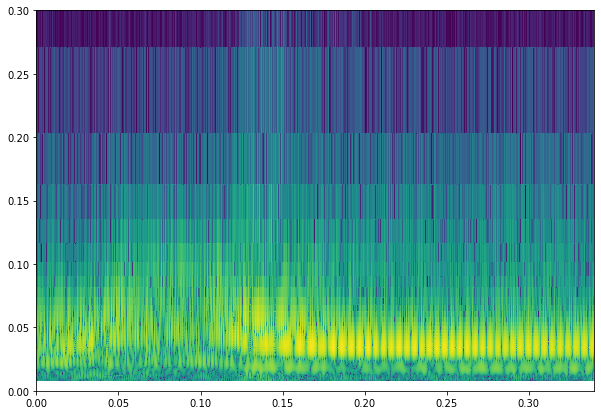

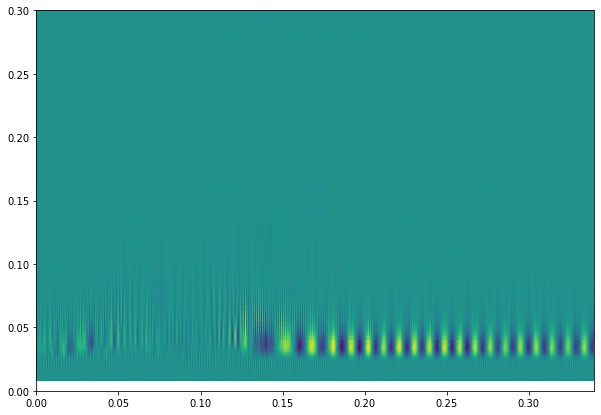

In [13]:
Ts = 1 /sr_orca
wavelet = 'morl'
scale = 32
sig_cwt = signal_orca[5000:20000]
freq_cwt = pywt.scale2frequency(wavelet, 4) / Ts
time_cwt = np.linspace(0, len(sig_cwt)/sr_orca, len(sig_cwt))


coef, freqs_cwt=pywt.cwt(sig_cwt,np.arange(1,256),'morl')

tt_cwt, ff_cwt = np.meshgrid(time_cwt, freqs_cwt)
plt.figure(figsize=(10,7))
plt.pcolormesh(tt_cwt, ff_cwt, 20*np.log10(np.abs(coef)+1e-4))
plt.ylim([0, 0.3])
plt.show()

plt.figure(figsize=(10,7))
plt.pcolormesh(tt_cwt, ff_cwt, coef)
plt.ylim([0, 0.3])
plt.show()